In [1]:
from SpeedTestLoggerResults import *

In [2]:
results = SpeedTestLoggerResults.load('results')

results.results[0]

{'type': 'result',
 'timestamp': datetime.datetime(2021, 2, 16, 14, 11, 25, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=75600), '-03')),
 'ping': {'jitter': 0.539, 'latency': 85.318},
 'download': {'bandwidth': 3073767, 'bytes': 34860672, 'elapsed': 11510},
 'upload': {'bandwidth': 296232, 'bytes': 1068672, 'elapsed': 3604},
 'packetLoss': 0,
 'isp': 'Vivo',
 'interface': {'internalIp': '192.168.15.225',
  'name': 'eth0',
  'macAddr': 'B8:27:EB:AE:F3:81',
  'isVpn': False,
  'externalIp': '177.43.14.170'},
 'server': {'id': 16638,
  'name': 'BBG Telecom',
  'location': 'Camaragibe',
  'country': 'Brazil',
  'host': 'speedtest.bbgtelecom.com.br',
  'port': 8080,
  'ip': '168.90.226.201'},
 'result': {'id': '4734305f-c975-448f-ab1e-4b9343abb0ce',
  'url': 'https://www.speedtest.net/result/c/4734305f-c975-448f-ab1e-4b9343abb0ce'}}

<AxesSubplot:>

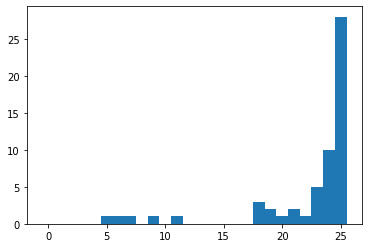

In [3]:
results.plot_hist(('download', 'bandwidth'), map_fn=lambda x: x*8 / 1000000, bins=[i - 0.5 for i in range(27)])

<AxesSubplot:>

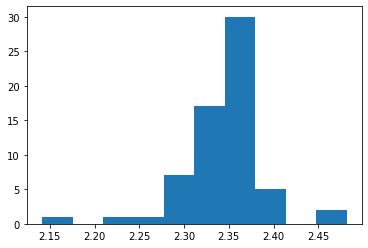

In [4]:
results.plot_hist(('upload', 'bandwidth'), map_fn=lambda x: x*8 / 1000000)

<AxesSubplot:>

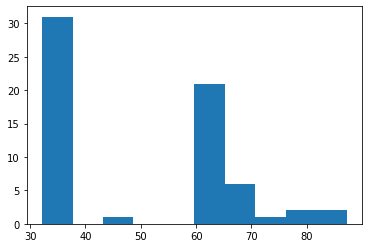

In [6]:
results.plot_hist(('ping', 'latency'))

In [194]:
down_band_by_hour = {}
up_band_by_hour = {}
ping_latency_by_hour = {}
for result in results.results:
    try:
        down_band_by_hour[result['timestamp'].hour].append(result['download']['bandwidth'])
    except:
        down_band_by_hour[result['timestamp'].hour] = [result['download']['bandwidth']]
    try:
        up_band_by_hour[result['timestamp'].hour].append(result['upload']['bandwidth'])
    except:
        up_band_by_hour[result['timestamp'].hour] = [result['upload']['bandwidth']]
    try:
        ping_latecy_by_hour[result['timestamp'].hour].append(result['ping']['latency'])
    except:
        ping_latency_by_hour[result['timestamp'].hour] = [result['ping']['latency']]
    
# Get averages
average_down_band_by_hour = {}
for key in down_band_by_hour:
    average_down_band_by_hour[key] = sum(down_band_by_hour[key])/len(down_band_by_hour[key])
average_up_band_by_hour = {}
for key in up_band_by_hour:
    average_up_band_by_hour[key] = sum(up_band_by_hour[key])/len(up_band_by_hour[key])
average_ping_latency_by_hour = {}
for key in ping_latency_by_hour:
    average_ping_latency_by_hour[key] = sum(ping_latency_by_hour[key])/len(ping_latency_by_hour[key])

# Convert to Mbps
for key in average_down_band_by_hour:
    average_down_band_by_hour[key] = average_down_band_by_hour[key]*8 / 1000000
for key in average_up_band_by_hour:
    average_up_band_by_hour[key] = average_up_band_by_hour[key]*8 / 1000000

In [195]:
sorted(average_down_band_by_hour.items())

[(0, 21.676568),
 (1, 23.818564),
 (2, 25.509596),
 (3, 25.4236),
 (4, 25.14952),
 (5, 25.519768),
 (6, 25.49336),
 (7, 25.439384),
 (8, 25.488416),
 (9, 24.309104),
 (10, 23.010188),
 (11, 23.864408),
 (12, 24.96935733333333),
 (13, 24.172245333333333),
 (14, 23.565049600000002),
 (15, 21.757666),
 (16, 23.28790933333333),
 (17, 22.553306666666668),
 (18, 25.093253333333333),
 (19, 20.603336),
 (20, 16.003946666666668),
 (21, 13.006002666666665),
 (22, 18.445093333333332),
 (23, 23.98982666666667)]

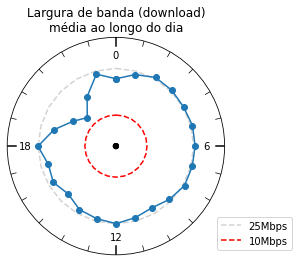

In [210]:
import numpy as np
plt.title('Largura de banda (download) média por hora do dia')
x, y = zip(*sorted(average_down_band_by_hour.items()))
x = list(map(lambda x: x / 24 * 2*3.14, x)) + [0]
y = list(y) + [y[0]]

ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad(np.arange(0, 360, 90)))
ax.set_xticklabels(['0', '6', '12', '18'])
ax.tick_params(axis='x', direction='in', pad=-25)
ax.grid(False)
ax.set_yticks([])
ax.set_yticklabels([])
# ax.set_yticks([25*0.4, 25])
# ax.set_yticklabels(['%dMbps'% (25*0.4), '25Mbps'])
small_tick = [35,35*0.95]
big_tick = [35, 35*0.92]
for i, t  in enumerate(np.deg2rad(np.arange(0,360,15))):
    tick = small_tick
    lw=0.72
    if i % 6 == 0:
        tick = big_tick
        lw=1.5
    
    ax.plot([t,t], tick, lw=lw, color="k")


ax.plot([i * 2*3.14/24 for i in range(24)] + [0], [25 for _ in range(25)], '--', color='lightgray', label='25Mbps')
ax.plot([i * 2*3.14/24 for i in range(24)] + [0], [25*0.4 for _ in range(25)], 'r--', label='10Mbps')
ax.plot(x, y, 'o-')
ax.bar([i * 2*3.14/24 for i in range(24)] + [0], [1 for _ in range(25)], color='k')
ax.set_ylim(0, 35)
ax.set_title('Largura de banda (download)\nmédia ao longo do dia')
ax.legend(bbox_to_anchor=(0.94, 0), loc='lower left')

Text(0, 0.5, 'Largura de banda (em Mbps)')

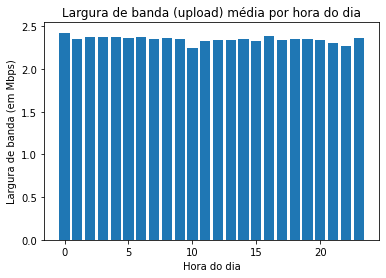

In [197]:


plt.title('Largura de banda (upload) média por hora do dia')
plt.bar(average_up_band_by_hour.keys(), average_up_band_by_hour.values())
plt.xlabel('Hora do dia')
plt.ylabel('Largura de banda (em Mbps)')

Text(0, 0.5, 'Latência de ping (em ms)')

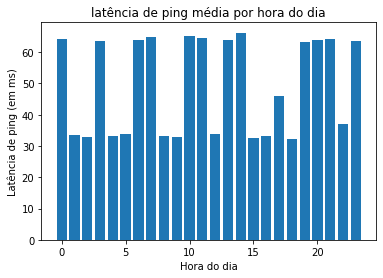

In [198]:
plt.title('latência de ping média por hora do dia')
plt.bar(average_ping_latency_by_hour.keys(), average_ping_latency_by_hour.values())
plt.xlabel('Hora do dia')
plt.ylabel('Latência de ping (em ms)')

In [212]:
0.4*240

96.0